In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
df=pd.read_csv('Algerian_forest_fires_dataset_cleaned.csv')

In [28]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [29]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [30]:
df.drop(['day','month','year'],axis=1,inplace=True)
#inplace = True saves the changes permanently 

In [31]:

df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [32]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [33]:
## Encoding
df['Classes']=np.where(df['Classes'].str.contains("not fire"),0,1)

In [34]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [35]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [36]:
##Dividing the features into dependent amd independent
x=df.drop('FWI',axis=1)
y=df['FWI']

In [37]:
##Train test split    
from sklearn.model_selection import train_test_split

In [38]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [39]:
X_train.shape,

((182, 11),)

##Feature Selection

In [40]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [41]:
#Supposing threshold , not any confirm number
corr_features=correlation(X_train,0.85)

In [42]:
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)

Feature Scaling / Standardization

In [43]:
##Feature scaling   or Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [44]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [45]:
X_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]])

Box plot to understand the effect of scaler

Text(0.5, 1.0, 'X)_train after scaling')

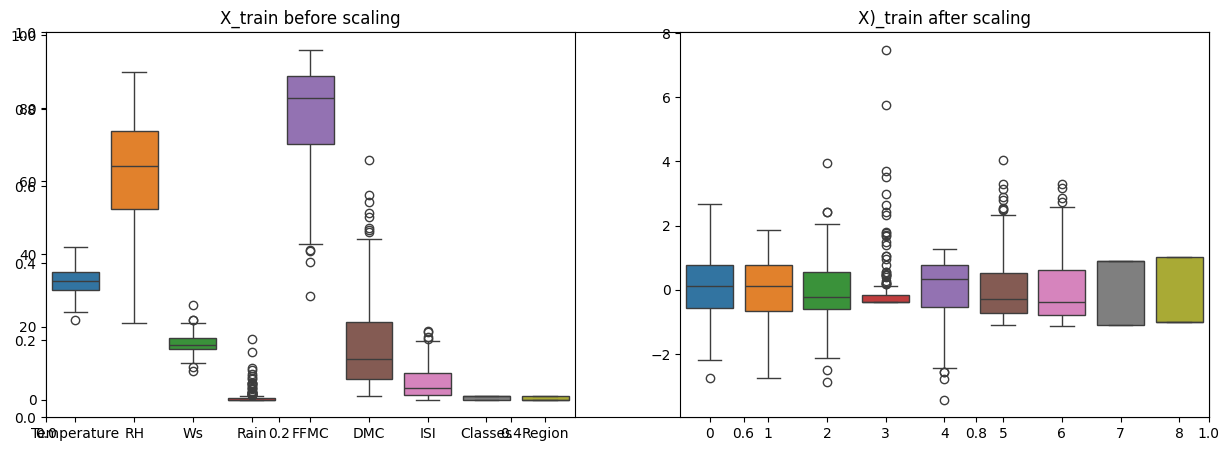

In [46]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title("X_train before scaling")
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title("X)_train after scaling")

Linear Regression Model

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [55]:
regression=LinearRegression()
regression.fit(X_train_scaled,Y_train)
y_pred=regression.predict(X_test_scaled)

Mae 0.546823646524997
Score 0.9847657384266951


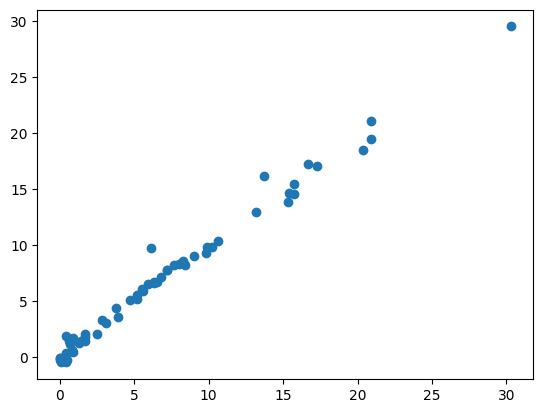

In [57]:
mae=mean_absolute_error(Y_test,y_pred)
score=r2_score(Y_test,y_pred)
print("Mae",mae)
print("Score",score)
plt.scatter(Y_test,y_pred)

#Lasso Regression

Mae 1.133175994914409
Score 0.9492020263112388


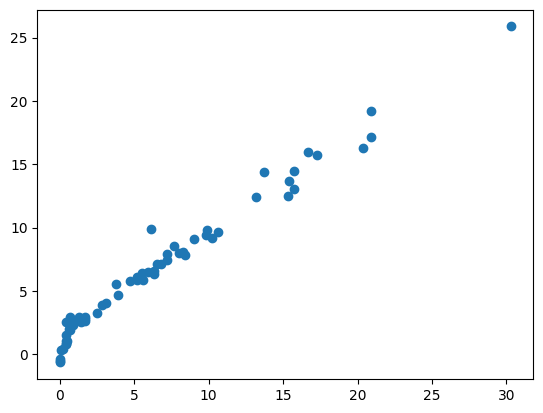

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso=Lasso()
lasso.fit(X_train_scaled,Y_train)
y_pred=lasso.predict(X_test_scaled)
mae=mean_absolute_error(Y_test,y_pred)
score=r2_score(Y_test,y_pred)
print("Mae",mae)
print("Score",score)
plt.scatter(Y_test,y_pred)

Ridge Regression Model

Mae 0.5642305340105691
Score 0.9842993364555513


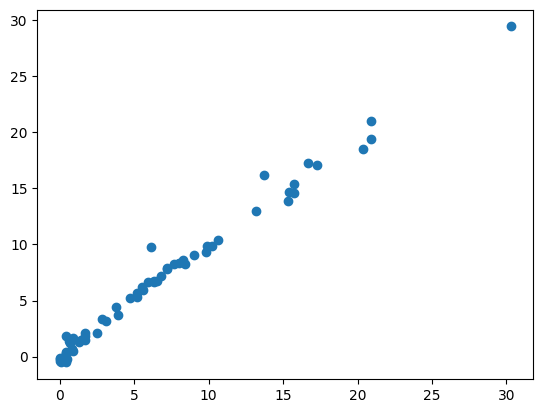

In [62]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge=Ridge()
ridge.fit(X_train_scaled,Y_train)
y_pred=ridge.predict(X_test_scaled)
mae=mean_absolute_error(Y_test,y_pred)
score=r2_score(Y_test,y_pred)
print("Mae",mae)
print("Score",score)
plt.scatter(Y_test,y_pred)

Elastic net regression

Mae 1.8822353634896
Score 0.8753460589519703


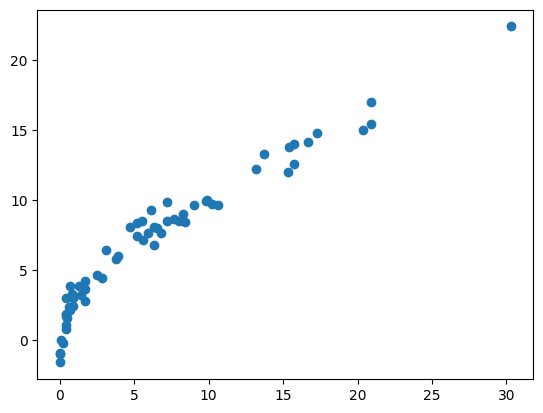

In [64]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elastic=ElasticNet()
elastic.fit(X_train_scaled,Y_train)
y_pred=elastic.predict(X_test_scaled)
mae=mean_absolute_error(Y_test,y_pred)
score=r2_score(Y_test,y_pred)
print("Mae",mae)
print("Score",score)
plt.scatter(Y_test,y_pred)

Cross validation lasso  / LassoCv

In [70]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(X_train_scaled,Y_train)

LassoCV(cv=5)

In [71]:
lassocv.predict(X_test_scaled)

array([ 8.17490595,  7.68312478, -0.25676525,  4.72643402,  6.78715772,
        1.77624325,  2.23148094,  7.64057821,  1.99176323,  3.39941035,
        0.62808928,  9.95945488,  9.36168319, 16.98503659, 18.28488762,
        1.61644108,  1.62751276, -0.6415713 ,  7.28510526,  3.10926518,
        1.95541903,  0.18069335,  6.47563129,  0.14318503, 20.99597009,
        5.11755206,  5.86208849,  9.75914403, -0.77037467,  9.91838577,
        6.72277075, -0.31776007, 10.31109643, 14.4365551 ,  1.71022677,
        0.83439752,  2.03414915,  5.97488529, -0.6263644 , -0.56200288,
        6.47253729,  2.07971408,  8.46741557, -0.8464481 , 15.40443856,
        8.32941189,  8.48782486,  1.44030355, 13.02752812,  1.20911545,
       29.08623849,  5.49737681, 17.15937199, 19.28890096, 13.71102991,
       16.05355549,  0.99056448,  9.0873725 ,  3.84455993, 14.43991192,
        5.23034139])

In [72]:
lassocv.alpha_

np.float64(0.05725391318234408)

In [74]:
lassocv.mse_path_

array([[53.64536329, 65.39074075, 54.89628985, 77.90299066, 39.38236846],
       [46.99139716, 59.81506814, 49.29840831, 75.6645852 , 35.31758355],
       [41.14908917, 53.9178721 , 42.49594889, 68.35708298, 31.76996123],
       [36.05788169, 48.41773965, 36.66879347, 61.92819453, 28.67296816],
       [31.62067285, 42.76466229, 31.68391904, 56.26841266, 24.93183295],
       [27.75285367, 37.81922812, 27.42599138, 51.28216115, 21.56888645],
       [24.3807738 , 33.49107651, 23.7950306 , 45.25481907, 18.66094162],
       [21.44052804, 29.70161639, 20.70460191, 39.90418045, 16.14837778],
       [18.876308  , 26.38208059, 18.07969934, 35.23429953, 13.97821475],
       [16.63960395, 23.47341883, 15.85530749, 31.15712074, 12.10483403],
       [14.68819307, 20.92329068, 13.97555108, 27.59649208, 10.48862803],
       [12.98525144, 18.68636627, 12.39173305, 24.48611006,  9.09521221],
       [11.49893734, 16.72312788, 11.06186319, 21.7677198 ,  7.89445038],
       [10.2013182 , 14.9991189 ,  9.9

Mae 0.6199701158263431
Score 0.9820946715928275


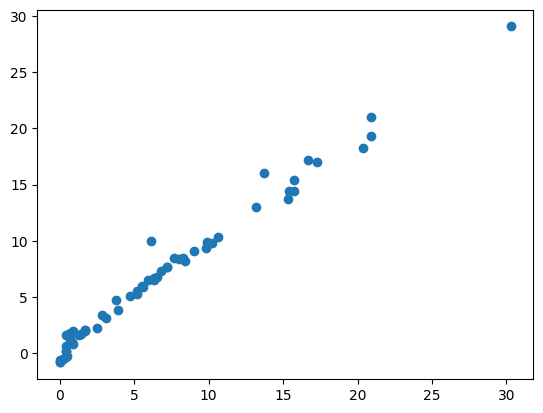

In [ ]:
y_pred=lassocv.predict(X_test_scaled)
pt.scatter(Y_test,y_pred)
mae=mean_albsolute_error(Y_test,y_pred)
score=r2_score(Y_test,y_pred)
print("Mae",mae)
print("Score",score)

#RidgeCv

MAE 0.5642305340105691
R2 0.9842993364555513


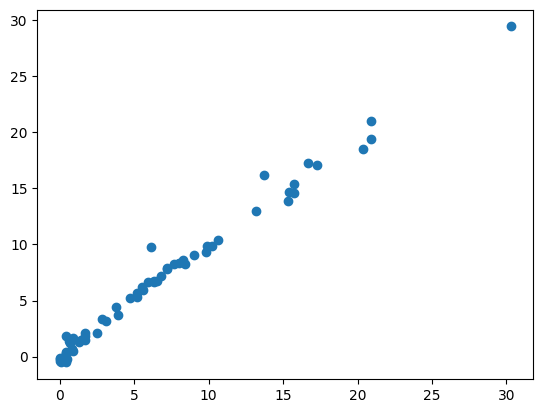

In [84]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_absolute_error
ridgecv=RidgeCV(cv=5)
ridgecv.fit(X_train_scaled,Y_train)
y_pred=ridgecv.predict(X_test_scaled)
plt.scatter(Y_test,y_pred)
mae=mean_absolute_error(Y_test,y_pred)
score=r2_score(Y_test,y_pred)
print("MAE",mae)
print("R2",score)

##Pickle the machine learning and preprocessing model

In [85]:
scaler

StandardScaler()

In [86]:
ridge

Ridge()

In [88]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))